#### Name: Andrina Watsemba
#### RegNo: S24B38/026
#### Assignment : WEB SCRAPING

####  Part 1: Multi-page book scraping

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Create lists
titles, prices, availability_list, ratings = [], [], [], []

print("Scraping books.toscrape.com - 50 pages...")

for page in range(1, 51):

    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
 
    response = requests.get(url)
    
    # Stop if page not found 
    if response.status_code == 404:
        print(f"Page {page} not found. Stopping.")
        break
    
    soup = BeautifulSoup(response.text, "html.parser")
    books = soup.find_all("article", class_="product_pod")
    
    for book in books:
        # Title
        titles.append(book.h3.a["title"])
        
        # Price 
        price_tag = book.find("p", class_="price_color")
        prices.append(price_tag.text.strip() if price_tag else "£0.00")
        
        # Availability
        avail_tag = book.find("p", class_="instock")
        availability = avail_tag.text.strip() if avail_tag else "Unknown"
        availability_list.append(availability)
        
        # Rating
        rating_tag = book.find("p", class_="star-rating")
        rating_word = "Zero"
        if rating_tag:
            for cls in rating_tag["class"]:
                if cls in ["One", "Two", "Three", "Four", "Five"]:
                    rating_word = cls
                    break
        ratings.append(rating_word)
    
    print(f"Page {page} scraped ({len(books)} books)")
    time.sleep(1)

print(f"Done! Total books: {len(titles)}")

Scraping books.toscrape.com - 50 pages...
Page 1 scraped (20 books)
Page 2 scraped (20 books)
Page 3 scraped (20 books)
Page 4 scraped (20 books)
Page 5 scraped (20 books)
Page 6 scraped (20 books)
Page 7 scraped (20 books)
Page 8 scraped (20 books)
Page 9 scraped (20 books)
Page 10 scraped (20 books)
Page 11 scraped (20 books)
Page 12 scraped (20 books)
Page 13 scraped (20 books)
Page 14 scraped (20 books)
Page 15 scraped (20 books)
Page 16 scraped (20 books)
Page 17 scraped (20 books)
Page 18 scraped (20 books)
Page 19 scraped (20 books)
Page 20 scraped (20 books)
Page 21 scraped (20 books)
Page 22 scraped (20 books)
Page 23 scraped (20 books)
Page 24 scraped (20 books)
Page 25 scraped (20 books)
Page 26 scraped (20 books)
Page 27 scraped (20 books)
Page 28 scraped (20 books)
Page 29 scraped (20 books)
Page 30 scraped (20 books)
Page 31 scraped (20 books)
Page 32 scraped (20 books)
Page 33 scraped (20 books)
Page 34 scraped (20 books)
Page 35 scraped (20 books)
Page 36 scraped (20 bo

In [6]:
# Save raw data
data = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Availability": availability_list,
    "Rating": ratings
})

# Save to an excel file
data.to_excel("books_watsemba.xlsx", index=False)
print(f"Raw data saved to books_watsemba.xlsx")

Raw data saved to books_watsemba.xlsx


In [7]:
# Load and clean
books = pd.read_excel("books_watsemba.xlsx")
books.head()

,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five


In [ ]:
#CLEANING 

# including Fixes hidden characters (Â£)

# STEP 1: Fix hidden characters (Â£ → £) and remove currency
# This handles BOTH normal £ and broken Â£
books["Price"] = books["Price"].astype(str).str.encode('utf-8').str.decode('utf-8', 'ignore')


In [9]:

# Fix broken pound
books["Price"] = books["Price"].str.replace("Â£", "£", regex=False)  


In [10]:

 # Remove £
books["Price"] = books["Price"].str.replace("£", "", regex=False) 


In [11]:
 

# Remove spaces
books["Price"] = books["Price"].str.strip()


In [12]:


# Convert
books["Price"] = pd.to_numeric(books["Price"], errors="coerce")       


In [13]:

# Rating mapping
rating_map = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5, "Zero": 0}
books["Rating"] = books["Rating"].map(rating_map)


In [15]:

# Handle missing values
print("Missing values ")
print(books.isnull().sum())


Missing values 
Title           0
Price           0
Availability    0
Rating          0
dtype: int64


In [17]:
#check for prices
print("check for the values after making above adjustments")
print(books[["Title", "Price", "Rating"]].head())

check for the values after making above adjustments
                                   Title  Price  Rating
0                   A Light in the Attic  51.77       3
1                     Tipping the Velvet  53.74       1
2                             Soumission  50.10       1
3                          Sharp Objects  47.82       4
4  Sapiens: A Brief History of Humankind  54.23       5


In [ ]:
# Insights
total = len(books)
avg_price = books["Price"].mean()
common_rating = books["Rating"].mode()[0]

print(f"Total Number of books: {total}")
print(f"Average price: £{avg_price:.2f}")
print(f"Most common rating: {common_rating} stars")

Total books: 1000
Average price: £35.07
Most common rating: 1 stars


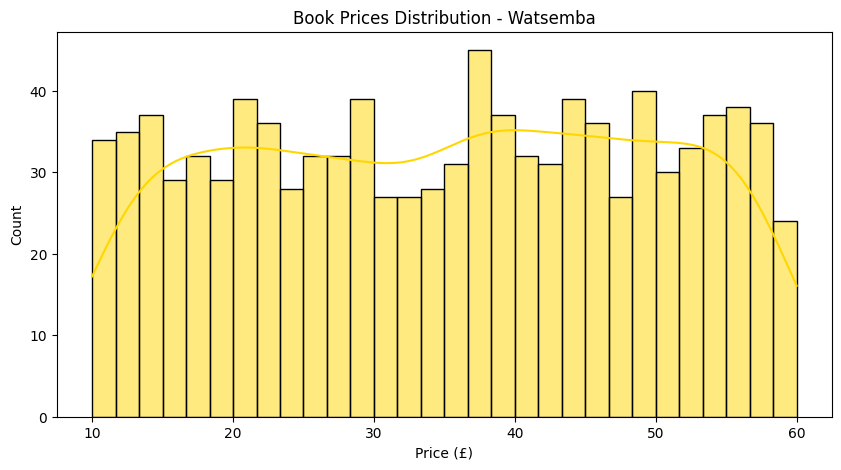

In [ ]:
# Graph showing price distribution
plt.figure(figsize=(10,5))
sns.histplot(books["Price"], bins=30, kde=True, color="gold")
plt.title("Book Prices Distribution - Watsemba")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.savefig("price_dist_watsemba.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12672\2066849390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=books, x="Rating", palette="Set2")


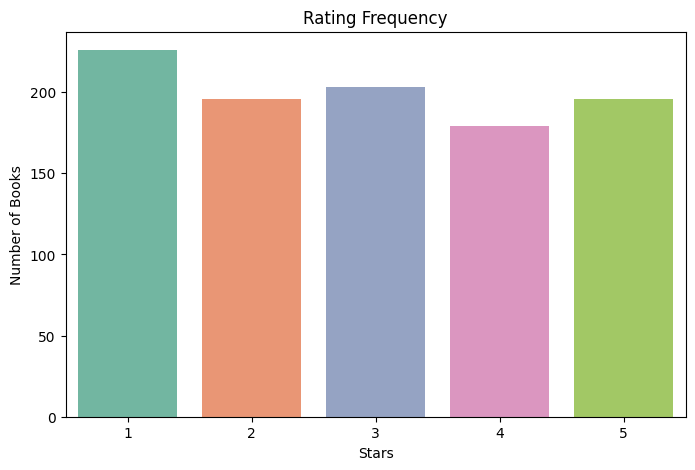

In [ ]:
# Graph showing rating frequency
plt.figure(figsize=(8,5))
sns.countplot(data=books, x="Rating", palette="Set2")
plt.title("Rating Frequency")
plt.xlabel("Stars")
plt.ylabel("Number of Books")
plt.savefig("rating_watsemba.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
# Save cleaned file
books.to_excel("books_watsemba_clean.xlsx", index=False)
print("\nALL DONE! Clean file + graphs saved.")



ALL DONE! Clean file + graphs saved.


### intresting trends i discovered

In [ ]:
# 1. Price vs Rating relationship
avg_price_by_rating = books.groupby("Rating")["Price"].mean().round(2)
print("1. Average price by rating:")
print(avg_price_by_rating)
print()

# 2. Are 5-star books cheaper or more expensive?
cheapest = books["Price"].min()
most_expensive = books["Price"].max()
five_star_avg = avg_price_by_rating[5]
three_star_avg = avg_price_by_rating[3]

print(f"2. Price comparison:")
print(f" Cheapest book: £{cheapest}")
print(f" Most expensive book: £{most_expensive}")
print(f" Average 5-star book: £{five_star_avg}")
print(f" Average 3-star book: £{three_star_avg}")
print()


1. Average price by rating:
Rating
1    34.56
2    34.81
3    34.69
4    36.09
5    35.37
Name: Price, dtype: float64

2. Price comparison:
   • Cheapest book: £10.0
   • Most expensive book: £59.99
   • Average 5-star book: £35.37
   • Average 3-star book: £34.69



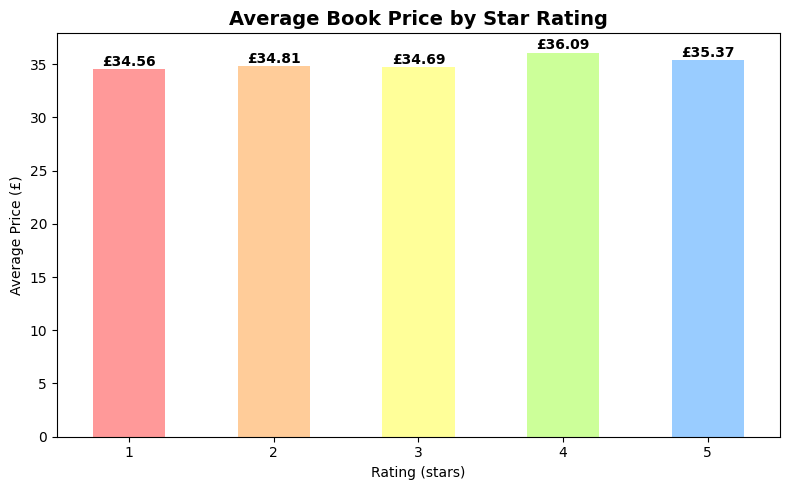

In [ ]:
# Price vs Rating
plt.figure(figsize=(8,5))
avg_price_by_rating.plot(kind='bar', color=['#ff9999','#ffcc99','#ffff99','#ccff99','#99ccff'])
plt.title("Average Book Price by Star Rating", fontsize=14, fontweight='bold')
plt.xlabel("Rating (stars)")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=0)
for i, v in enumerate(avg_price_by_rating):
    plt.text(i, v + 0.3, f"£{v}", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig("price_by_rating_watsemba.png", dpi=300, bbox_inches='tight')
plt.show()